In [1]:
from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.dispatching.feature_extraction import (
    feature_observer_factory,
    FeatureObserverType,
    CompositeFeatureObserver,
)
from job_shop_lib.dispatching import (
    Dispatcher,
    DispatchingRuleSolver,
    HistoryTracker,
    PruningFunction,
    composite_pruning_function_factory,
)
from job_shop_lib.visualization import plot_gantt_chart

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [2]:
pruning_function = composite_pruning_function_factory(
    [
        PruningFunction.DOMINATED_OPERATIONS,
        # PruningFunction.NON_IMMEDIATE_MACHINES,
    ]
)
dispatcher = Dispatcher(instance, pruning_function=pruning_function)

feature_observers = [
    feature_observer_factory(feature_observer_type, dispatcher=dispatcher)
    for feature_observer_type in FeatureObserverType
    if feature_observer_type != FeatureObserverType.COMPOSITE
]
history = HistoryTracker(dispatcher)
composite = CompositeFeatureObserver(dispatcher, feature_observers)

print(composite)

CompositeFeatureObserver:

-------------------------

operations features:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob
0      1.0                0.0       1.0          0.0            0.0
1      0.0                1.0       1.0          0.0            1.0
2      0.0                2.0       7.0          0.0            2.0
3      1.0                0.0       5.0          0.0            0.0
4      0.0                5.0       1.0          0.0            1.0
5      0.0                6.0       1.0          0.0            2.0
6      1.0                0.0       1.0          0.0            0.0
7      0.0                1.0       3.0          0.0            1.0
8      0.0                4.0       2.0          0.0            2.0


machines features:
   IsReady  EarliestStartTime  Duration  IsScheduled  RemainingOperations
0      1.0                0.0       5.0          0.0                  3.0
1      1.0                0.0       8.0          0.0                  3.0
2 

In [3]:
solver = DispatchingRuleSolver("most_work_remaining")
print(f"------------------- Step {0} -------------------")
print(composite)
for i in range(9):
    solver.step(dispatcher)
    print(f"------------------- Step {i + 1} -------------------")
    scheduled_operation = history.history[-1]
    print(f"Scheduled operation: {scheduled_operation}")
    print(f"Current time: {dispatcher.current_time()}")
    print("New node features:")
    print(composite)

------------------- Step 0 -------------------
CompositeFeatureObserver:

-------------------------

operations features:
   IsReady  EarliestStartTime  Duration  IsScheduled  PositionInJob
0      1.0                0.0       1.0          0.0            0.0
1      0.0                1.0       1.0          0.0            1.0
2      0.0                2.0       7.0          0.0            2.0
3      1.0                0.0       5.0          0.0            0.0
4      0.0                5.0       1.0          0.0            1.0
5      0.0                6.0       1.0          0.0            2.0
6      1.0                0.0       1.0          0.0            0.0
7      0.0                1.0       3.0          0.0            1.0
8      0.0                4.0       2.0          0.0            2.0


machines features:
   IsReady  EarliestStartTime  Duration  IsScheduled  RemainingOperations
0      1.0                0.0       5.0          0.0                  3.0
1      1.0                0.0

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart for Example instance'}, xlabel='Time units', ylabel='Machines'>)

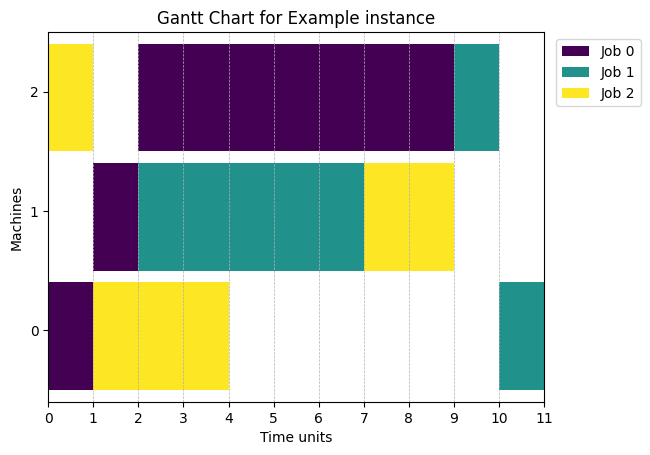

In [4]:
plot_gantt_chart(dispatcher.schedule)